**DSEM Assignment 2**<br>
Rhea Bajpai

# **Advertisement Click Prediction**
**Abstract**<br>

Advertisement click prediction is a data science problem that aims to predict if a user will click on an online advertisement or not. The prediction is made based on a variety of features related to the user, the advertisement, and the in which the ad is displayed.

In [ ]:
!pip install eli5 #installing dependencies
!pip install h2o 

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configuration import Configuration, ConfigurationError
  File "/usr/local/lib/python3.8/dist-packages/pip/_intern

In [ ]:
#importing the library
import pandas as pd   
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML
warnings.filterwarnings('ignore')
h2o.init()#initializing the h2o library

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpx1css2si
  JVM stdout: /tmp/tmpx1css2si/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpx1css2si/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_x9p4lo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data = h2o.import_file('https://raw.githubusercontent.com/Rhea3110/DSEM/main/Ad_click_prediction_train.csv')  #train file import

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data["is_click"] = data["is_click"].asfactor() #convert "is_click" into a factor in H2O


In [ ]:
train, test = data.split_frame(ratios = [.7], seed = 10)
#split a given dataset into two sets: a training set and a testing set

In [ ]:
print(train)

  ﻿session_id  DateTime                   user_id  product      campaign_id    webpage_id    product_category_1    product_category_2    user_group_id  gender      age_level    user_depth    city_development_index    var_1    is_click
       129781  02/07/2017 00:00  243253            C                 359520         13787                     4                   nan                8  Female              2             2                       nan        0           0
        90569  02/07/2017 00:01  663656            C                 405490         60305                     3                   nan                2  Male                2             3                         2        1           0
       151475  02/07/2017 00:01  509591            I                 359520         13787                     2                   nan                1  Male                1             3                       nan        0           0
        17583  02/07/2017 00:01       1.09146e+06  F        

In [ ]:
print(test)

  ﻿session_id  DateTime                   user_id  product      campaign_id    webpage_id    product_category_1    product_category_2    user_group_id  gender      age_level    user_depth    city_development_index    var_1    is_click
       140690  02/07/2017 00:00  858557            C                 359520         13787                     4                   nan               10  Female              4             3                         3        0           0
       333291  02/07/2017 00:00  243253            C                 105960         11085                     5                   nan                8  Female              2             2                       nan        0           0
       464848  02/07/2017 00:00       1.09745e+06  I                 359520         13787                     3                   nan                3  Male                3             3                         2        1           0
       428267  02/07/2017 00:02  312475            H        

In [ ]:
#dropping unwanted columns
y = 'is_click'
data=data.drop('DateTime')
data=data.drop('user_id') 
data=data.drop('\ufeffsession_id')
X=data.drop(y)
X=X.col_names #columns name
print(X)


['product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'gender', 'age_level', 'user_depth', 'city_development_index', 'var_1']


In the below code I am using the H2OAutoML class from the H2O Python package to automatically build and tune machine learning models. Here is what each of the parameters in the constructor means:

**max_models**: This parameter specifies the maximum number of models to be built by the H2OAutoML object. In this case, the value is set to 3, which means that the H2OAutoML object will build at most 3 models.

**seed**: This parameter sets the random seed used by H2O to ensure that the results are reproducible. In this case, the value is set to 10.

**verbosity**: This parameter controls the amount of logging output from the H2OAutoML object. The "debug" level provides the most detailed logging information.

nfolds: This parameter specifies the number of cross-validation folds to be used during model training. In this case, the value is set to 0, which means that no cross-validation will be performed. If this parameter is set to a positive integer, the H2OAutoML object will perform cross-validation to evaluate the performance of the models.

In [ ]:
aml = H2OAutoML(max_models=3,seed=10,verbosity="debug",nfolds=0)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |
01:44:21.573: Project: AutoML_1_20230301_14421
01:44:21.576: Cross-validation disabled by user: no fold column nor nfolds > 1.
01:44:21.576: Setting stopping tolerance adaptively based on the training frame: 0.001755572417367758
01:44:21.577: Build control seed: 10
01:44:21.587: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
01:44:22.932: training frame: Frame key: AutoML_1_20230301_14421_training_py_3_sid_a600    cols: 15    rows: 291851  chunks: 8    size: 8472989  checksum: -886146868686999994
01:44:22.961: validation frame: Frame key: AutoML_1_20230301_14421_validation_py_3_sid_a600    cols: 15    rows: 32610  chunks: 8    size: 1692906  checksum: -881970908106279552
01:44:22.961: leaderboard frame: Frame key: AutoML_1_20230301_14421_validation_py_3_sid_a600    cols: 15    rows: 32610  chunks: 8    size: 1692906  checksum: -88197090810627

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20230301_14421


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          187084                 0            15           13.8667       1             823           498.8

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06250649473143309
RMSE: 0.2500129891254314
LogLoss: 0.24128091155151826
Mean Per-Class Error: 0.40953532229511846
AUC: 0.6419055326112164
AUCPR: 0.10976184114979996
Gini: 0.2838110652224328

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08051179935688049
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      198406  73573  0.2705   (73573.0/271979.0)
1      10901   8971   0.5486   (10901.0/19872.0)
Total  209307  82544  0.2894   (84474.0/291851.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0805118    0.175187  156
max f2                       0.062666     0.304552  232
max f0point5                 0.0954634    0.136098  106
max accuracy                 0.208549     0.931897  0
max precision                0.162932     0.266932  13
max recall                   0.0236166    1         390
max specificity              0.208549     0.999985  0
max absolute_mcc             0.0680979    0.105087  208
max min_per_class_accuracy   0.0691921    0.601147  203
max mean_per_class_accuracy  0.0654593    0.603505  220
max tns                      0.208549     271975    0
max fns                      0.208549     19872     0
max fps                      0.0150022    271979    399
max tps                      0.0236166    19872     390
max tnr                      0.208549     0.999985  0
max fnr                      0.208549     1         0
max fpr                      0.0150022    1         399
max tpr                      0.0236166    1         390

Gains/Lift Table: Avg response rate:  6.81 %, avg score:  6.82 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102073                   0.12952            2.61291   2.61291            0.177912         0.143793   0.177912                    0.143793            0.0266707       0.0266707                  161.291   161.291            0.0176663
2        0.020161                    0.118988           2.26491   2.4411             0.154217         0.122706   0.166213                    0.133382            0.0225443       0.049215                   126.491   144.11             0.0311768
3        0.0302586                   0.111941           1.89874   2.26011            0.129284         0.114433   0.15389                     0.127059            0.0191727       0.0683877                  89.8735   126.011            0.040915
4        0.0409079                   0.108046           1.824     2.14658            0.124196         0.109983   0.14616                     0.122614            0.0194243       0.087812                   82.4004   114.658            0.0503312
5        0.0506971                   0.107005           1.76835   2.07355            0.120406         0.107588   0.14

In [ ]:
lb = aml.leader # retrieves the best performing model from the H2OAutoML object 

In [ ]:
print(lb)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20230301_14421


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          187084                 0            15           13.8667       1             823           498.8

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06250649473143309
RMSE: 0.2500129891254314
LogLoss: 0.24128091155151826
Mean Per-Class Error: 0.40953532229511846
AUC: 0.6419055326112164
AUCPR: 0.10976184114979996
Gini: 0.2838110652224328

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08051179935688049
       0       1      Error    Rate
-----  ------  -----  -------  ----------------

explain
MSE: 0.06313144388678277
RMSE: 0.25125971401476754
MAE: 0.12560743942534053
RMSLE: 0.17524090088723057
Mean Residual Deviance: 

In [ ]:
print(test)

  ﻿session_id  DateTime                   user_id  product      campaign_id    webpage_id    product_category_1    product_category_2    user_group_id  gender      age_level    user_depth    city_development_index    var_1    is_click
       140690  02/07/2017 00:00  858557            C                 359520         13787                     4                   nan               10  Female              4             3                         3        0           0
       333291  02/07/2017 00:00  243253            C                 105960         11085                     5                   nan                8  Female              2             2                       nan        0           0
       464848  02/07/2017 00:00       1.09745e+06  I                 359520         13787                     3                   nan                3  Male                3             3                         2        1           0
       428267  02/07/2017 00:02  312475            H        

In [ ]:
prediction = aml.leader.predict(test) #method to generate predictions 

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
print(prediction)

  predict        p0         p1
        0  0.953319  0.0466815
        0  0.944531  0.0554691
        0  0.940952  0.0590476
        0  0.928457  0.0715434
        0  0.935503  0.0644971
        0  0.948687  0.0513129
        1  0.924774  0.0752264
        0  0.933047  0.0669531
        0  0.969165  0.0308353
        0  0.948528  0.051472
[138830 rows x 3 columns]



In [ ]:
prediction=prediction.as_data_frame() #method to convert an object to a Pandas DataFrame
prediction=prediction['predict'].tolist()#built-in Python function that can be used to convert an iterable
print(type(prediction))
print(len(prediction))
print(prediction)

<class 'list'>
138830
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
print(test)

  ﻿session_id  DateTime                   user_id  product      campaign_id    webpage_id    product_category_1    product_category_2    user_group_id  gender      age_level    user_depth    city_development_index    var_1    is_click
       140690  02/07/2017 00:00  858557            C                 359520         13787                     4                   nan               10  Female              4             3                         3        0           0
       333291  02/07/2017 00:00  243253            C                 105960         11085                     5                   nan                8  Female              2             2                       nan        0           0
       464848  02/07/2017 00:00       1.09745e+06  I                 359520         13787                     3                   nan                3  Male                3             3                         2        1           0
       428267  02/07/2017 00:02  312475            H        

In [ ]:
te=test.as_data_frame() #method to convert an object to a Pandas DataFrame
te=te['is_click'].tolist() #built-in Python function that can be used to convert an iterable
print(type(te))
print(len(te))
print(te)

<class 'list'>
138830
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(prediction)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(te,prediction) #valuate the performance of a classifier algorithm by comparing the predicted and true labels for a set of data
print(cm)

[[86738 42778]
 [ 5181  4133]]


In [ ]:
from sklearn.metrics import accuracy_score
# evaluate the performance of a classifier algorithm by comparing the predicted and true labels for a set of data.
acc= accuracy_score(te,prediction)
print("Accuracy is: ",acc)

Accuracy is:  0.6545487286609523


My traintest split has a 70/30 ratio and seeing the regularization later on and the confusion matrx i dont think there is much overfitting



In [ ]:
train_pd=train.as_data_frame()  #converting into data frame
test_pd=test.as_data_frame()
# is used to remove any rows from a pandas DataFrame 
train_pd=train_pd[~train_pd.isin([np.nan, np.inf, -np.inf]).any(1)]
test_pd=test_pd[~test_pd.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
from sklearn.preprocessing import LabelEncoder
#to extract the last column
y_train_pd =train_pd.iloc[:,-1]
y_test_pd =test_pd.iloc[:,-1]
X_train_pd=train_pd[['product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'gender', 'age_level', 'user_depth', 'city_development_index', 'var_1']]
X_test_pd=test_pd[['product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'gender', 'age_level', 'user_depth', 'city_development_index', 'var_1']]

In [ ]:
#encode categorical variables into numerical labels
le = LabelEncoder()
y_train_pd = le.fit_transform(y_train_pd)
y_train_pd = pd.DataFrame(y_train_pd, columns=['is_click'])
y_test_pd = le.fit_transform(y_test_pd)
y_test_pd = pd.DataFrame(y_test_pd, columns=['is_click'])
X_train_pd = pd.get_dummies(X_train_pd)
X_test_pd = pd.get_dummies(X_test_pd)
train_concatenated = pd.concat([X_train_pd, y_train_pd],axis=1)
X_train_pd_h2o =h2o.H2OFrame(X_train_pd) 
X_test_pd_h2o = h2o.H2OFrame(X_test_pd)
X_train_pd_h2o_columns=X_train_pd_h2o.columns
train_concatenated_h2o = h2o.H2OFrame(train_concatenated) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Questions

### Is the relationship significant?



In [ ]:
print(X_train_pd.columns)

Index(['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male'],
      dtype='object')


In [ ]:
#finding the p value to check the significant features
import statsmodels.api as sm
# Defining the dependent and independent variables
dependent_var =y_train_pd['is_click'] 
independent_vars = X_train_pd[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']].reset_index(drop=True)
# Fitting the OLS model
model = sm.OLS(dependent_var, independent_vars).fit()
p_values = model.summary2().tables[1]['P>|t|']
print(p_values.round(4))

campaign_id               0.2524
webpage_id                0.8055
product_category_1        0.9417
product_category_2        0.4176
user_group_id             0.6959
age_level                 0.6893
user_depth                0.3683
city_development_index    0.9320
var_1                     0.0030
product_A                 0.6306
product_B                 0.5971
product_C                 0.4172
product_D                 0.5587
product_E                 0.0639
product_F                 0.7805
product_G                 0.4258
product_H                 0.0873
product_I                 0.6815
product_J                 0.0257
gender_Female             0.9931
gender_Male               0.0063
Name: P>|t|, dtype: float64


In [ ]:
print(lb)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20230301_14421


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          187084                 0            15           13.8667       1             823           498.8

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06250649473143309
RMSE: 0.2500129891254314
LogLoss: 0.24128091155151826
Mean Per-Class Error: 0.40953532229511846
AUC: 0.6419055326112164
AUCPR: 0.10976184114979996
Gini: 0.2838110652224328

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08051179935688049
       0       1      Error    Rate
-----  ------  -----  -------  ----------------

In [ ]:
 #selects the best-performing model based on the leaderboard, retrieves the model object, evaluates its performance on a test dataset.
leaderboard = aml.leaderboard 
best_model_id = leaderboard[0, "model_id"]
best_model = h2o.get_model(best_model_id)
performance = best_model.model_performance(test_data=test)
print(performance)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.062319117889547686
RMSE: 0.24963797365294343
LogLoss: 0.24379698573305886
Mean Per-Class Error: 0.44142350602981306
AUC: 0.5807614224692499
AUCPR: 0.08554733779945227
Gini: 0.16152284493849978

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07421317391287457
       0      1      Error    Rate
-----  -----  -----  -------  ------------------
0      85257  44259  0.3417   (44259.0/129516.0)
1      5040   4274   0.5411   (5040.0/9314.0)
Total  90297  48533  0.3551   (49299.0/138830.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.0742132    0.147769   173
max f2                       0.053203     0.273933   275
max f0point5                 0.0928013    0.10962    105
max accuracy                 0.209142     0.932904   0
max precision                0.1238

In [ ]:
# computes the R-squared value for the best-performing H2O model
r_squared = best_model.r2()
print("R-squared: {}".format(r_squared))

R-squared: 0.01492212399047943


### Are any model assumptions violated?


### Assumption



> The Observations are Independent




In [ ]:
print(X_train_pd.head().to_markdown())
print(y_train_pd)

|    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |   var_1 |   product_A |   product_B |   product_C |   product_D |   product_E |   product_F |   product_G |   product_H |   product_I |   product_J |   gender_Female |   gender_Male |
|---:|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|--------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|----------------:|--------------:|
| 13 |        404347 |        53587 |                    1 |               146115 |               9 |           3 |            3 |                        3 |       1 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           1 |           0 |         

In [ ]:
print(X_test_pd.head().to_markdown())
print(y_test_pd)

|    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |   var_1 |   product_A |   product_B |   product_C |   product_D |   product_E |   product_F |   product_G |   product_H |   product_I |   product_J |   gender_Female |   gender_Male |
|---:|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|--------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|----------------:|--------------:|
|  6 |        404347 |        53587 |                    1 |               146115 |               2 |           2 |            3 |                        1 |       1 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           1 |           0 |         

In [ ]:
#concatenate the training and testing data sets column-wise into a single Pandas DataFrame for both the features and target variables
combined_train = pd.concat([X_train_pd, y_train_pd], axis=1)
combined_test = pd.concat([X_test_pd, y_test_pd], axis=1)
print(combined_train.columns)
print(combined_test.head().to_markdown())

Index(['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male', 'is_click'],
      dtype='object')
|    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |   var_1 |   product_A |   product_B |   product_C |   product_D |   product_E |   product_F |   product_G |   product_H |   product_I |   product_J |   gender_Female |   gender_Male |   is_click |
|---:|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|--------:|------------:|------------:|------------:|------------:|------------:|------------:|----------

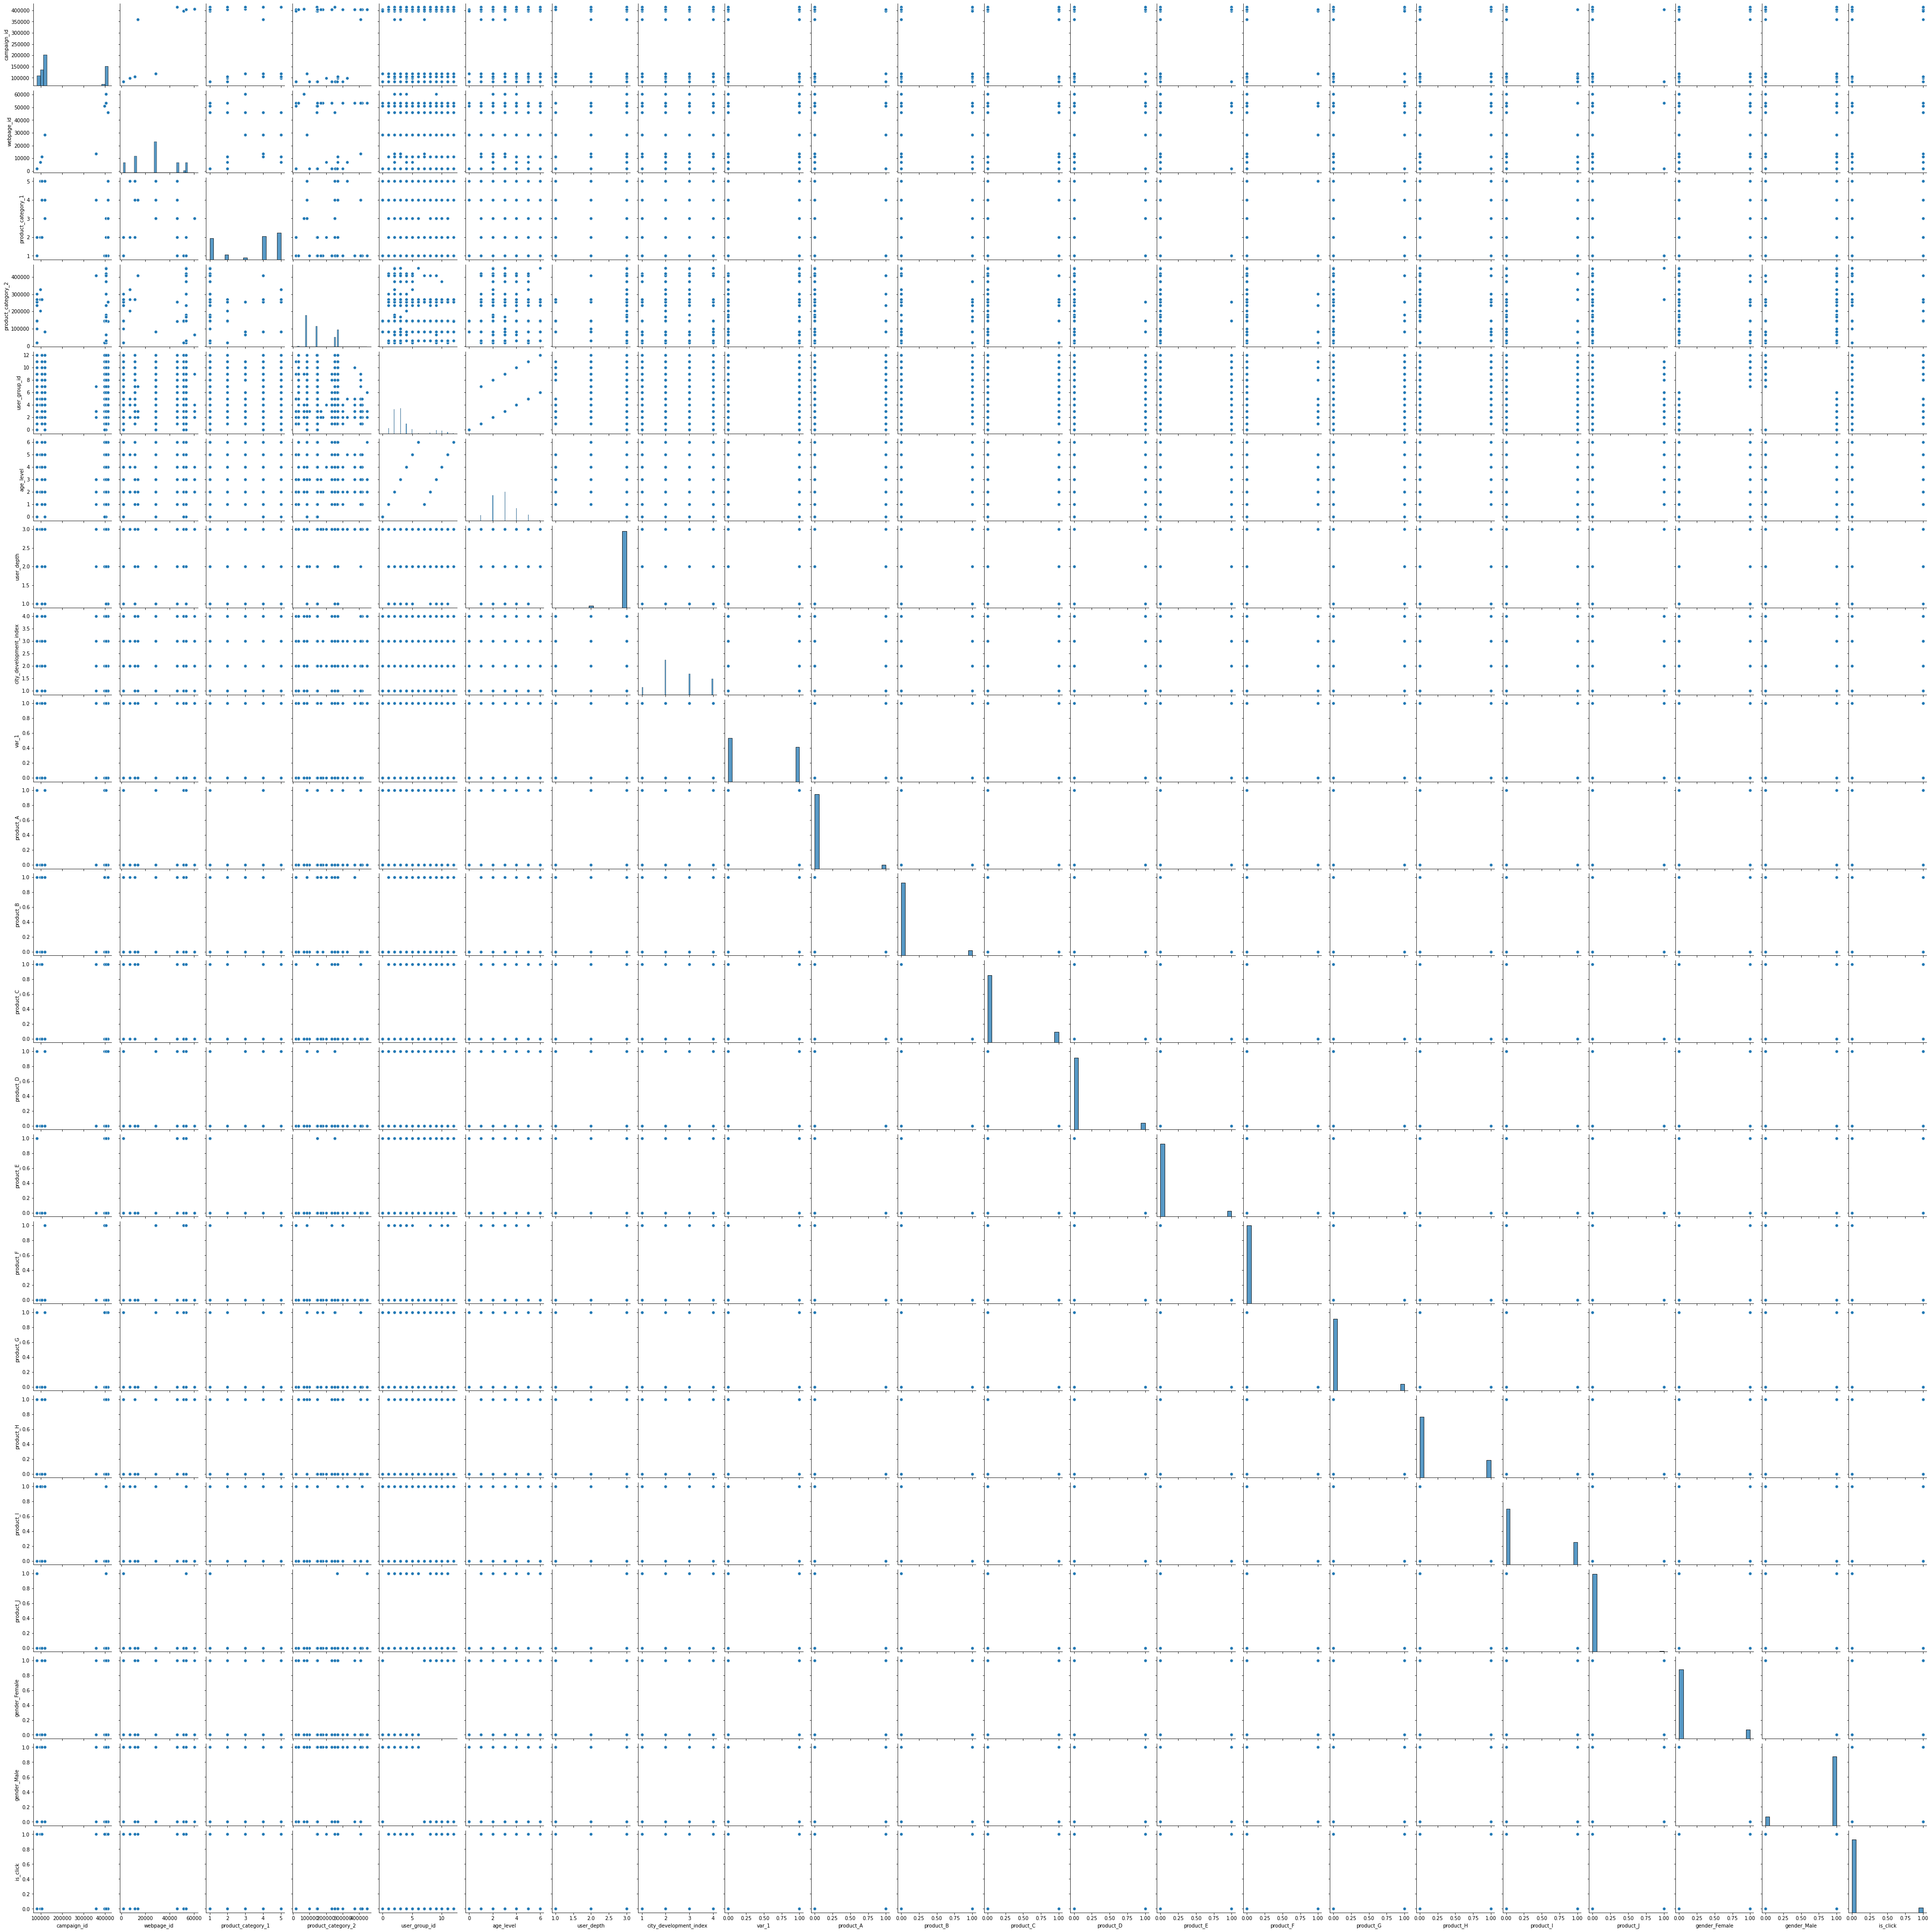

In [ ]:
sns.pairplot(combined_train)#a pairwise plot of a dataset

Yes,we can observe from the sns pairplot that there is collinearity between the characteristics and that they are largely independent of one another.

> There are No Extreme Outliers

With the code below, we can observe that there are no extreme outliers because the accuracy percentage before and after adding outliers is almost nonexistent.



In [ ]:
# performing the outliers on train data only
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
logisticRegr = LogisticRegression()
combined_train = combined_train.dropna(axis=0, how='any', subset=None, inplace=False)
X1 = combined_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]
y1 = combined_train[['is_click']]
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.2)
logisticRegr.fit(X1_train_data, y1_train_data)

LogisticRegression()

In [ ]:
#applies the trained logistic regression model to predict the target variable for a new test dataset "X1_test_data" 
#calculates the model accuracy on the test dataset using the predicted values and actual values.
threshold = 0.5
y1_new=logisticRegr.predict(X1_test_data)
a1=logisticRegr.score(X1_test_data, y1_test_data)
print(a1)

0.9302325581395349


In [ ]:
Q1=combined_train.quantile(0.05)#calculates the value at the 5th percentile

In [ ]:
Q3=combined_train.quantile(0.95)#calculates the value at the 95th percentile

In [ ]:
final_data = combined_train[~((combined_train< (Q1)) |(combined_train > (Q3))).any(axis=1)]

In [ ]:
X2 = combined_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]
y2 = combined_train[['is_click']]
#splits the dataset into training and testing sets using an 80-20 split, trains a logistic regression model on the training data
#predicts the target variable for the test data
#calculates the model accuracy on the test data
X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2,)
logisticRegr.fit(X2_train_data, y2_train_data)
logisticRegr.predict(X2_test_data)
a2=logisticRegr.score(X2_test_data, y2_test_data)
print(a2)

0.9251769464105156


In [ ]:
print(f"Difference in accuracy {a2-a1}")

Difference in accuracy -0.005055611729019249


> The Sample Size is Sufficiently Large

The dataset ha  rows and 22 columns hence the dataset is sufficiently large



In [ ]:
print(combined_train.shape)

(4942, 22)


> There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable

As relatively few columns have a p-value of less than 0.05 when we look at the data, we can infer that there is no significant relationship.



In [ ]:
#repeating the same code
#finding the p value to check the significant features
import statsmodels.api as sm
# Defining the dependent and independent variables
dependent_var =y_train_pd['is_click']
independent_vars = X_train_pd[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']].reset_index(drop=True)
# Fitting the OLS model
model = sm.OLS(dependent_var, independent_vars).fit()
p_values = model.summary2().tables[1]['P>|t|']
print(p_values.round(4))

campaign_id               0.2524
webpage_id                0.8055
product_category_1        0.9417
product_category_2        0.4176
user_group_id             0.6959
age_level                 0.6893
user_depth                0.3683
city_development_index    0.9320
var_1                     0.0030
product_A                 0.6306
product_B                 0.5971
product_C                 0.4172
product_D                 0.5587
product_E                 0.0639
product_F                 0.7805
product_G                 0.4258
product_H                 0.0873
product_I                 0.6815
product_J                 0.0257
gender_Female             0.9931
gender_Male               0.0063
Name: P>|t|, dtype: float64


In [ ]:
import statsmodels.api as sm
# fit a logistic regression model with logit link function
model = sm.Logit(combined_train['is_click'].values, sm.add_constant(combined_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']].values)).fit()
print(model.summary())

         Current function value: 0.229909
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4942
Model:                          Logit   Df Residuals:                     4921
Method:                           MLE   Df Model:                           20
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                0.007570
Time:                        01:53:25   Log-Likelihood:                -1136.2
converged:                      False   LL-Null:                       -1144.9
Covariance Type:            nonrobust   LLR p-value:                    0.6312
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3358   4.42e+06  -2.11e-06      1.000   -8.66e+06    8.66e+06
x1            1.8e-06   3.04e-06      0.593      0.553   -4.15e-0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


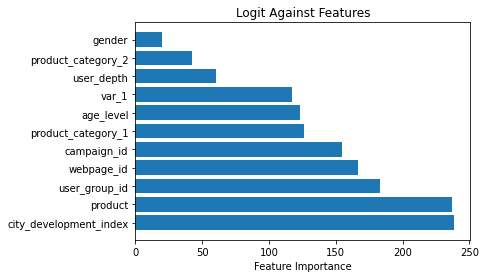

In [ ]:
import matplotlib.pyplot as plt
#visualizes the relative importance of each feature in the best-performing model in an H2O AutoML
best_model = aml.leader
feature_importance = best_model.varimp()
plt.barh(range(len(feature_importance)), [val[1] for val in feature_importance], align='center')
plt.yticks(range(len(feature_importance)), [val[0] for val in feature_importance])
plt.xlabel('Feature Importance')
plt.title('Logit Against Features')
plt.show()

> The Response Variable is Binary



In [ ]:
print(y_train_pd)

       is_click
0             0
1             0
2             0
3             0
4             0
...         ...
51027         0
51028         0
51029         0
51030         0
51031         0

[51032 rows x 1 columns]


looking above the response above is binary

> There is No Multicollinearity Among Explanatory Variables

Yes, some of the data are correlated; please see question 3 since it has been repeated.

## Is there any multicollinearity in the model?
> yes, we may infer from the VIF data that some variables are correlated with one another, possibly because they are connected to the same subject.



In [ ]:
X_variables =combined_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]
numColumns = combined_train.select_dtypes("number").columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [ ]:
print(vif_data)

                   feature         VIF
0              campaign_id   62.916299
1               webpage_id   60.158388
2       product_category_1    7.650576
3       product_category_2    3.841870
4            user_group_id  917.957078
5                age_level  155.798735
6               user_depth    1.019913
7   city_development_index    1.048064
8                    var_1    1.061971
9                product_A         inf
10               product_B         inf
11               product_C         inf
12               product_D         inf
13               product_E         inf
14               product_F         inf
15               product_G         inf
16               product_H         inf
17               product_I         inf
18               product_J         inf
19           gender_Female         inf
20             gender_Male         inf


## In the multivariate models are predictor variables independent of all the other predictor variables?
> Yes, from the sns pairplot, we can see that the there is collinearity between features





In [ ]:
from statsmodels.graphics.gofplots import qqplot
data_norm = combined_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]

<Figure size 576x360 with 0 Axes>

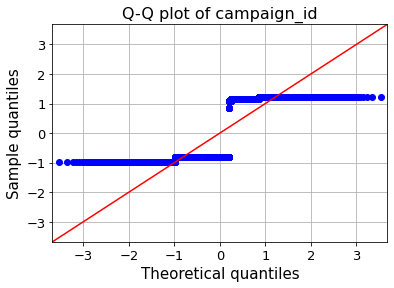

<Figure size 576x360 with 0 Axes>

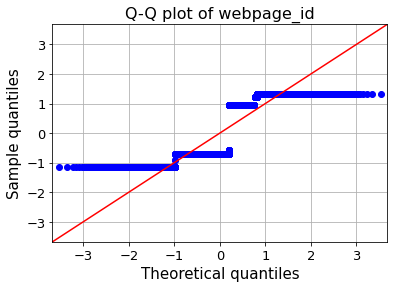

<Figure size 576x360 with 0 Axes>

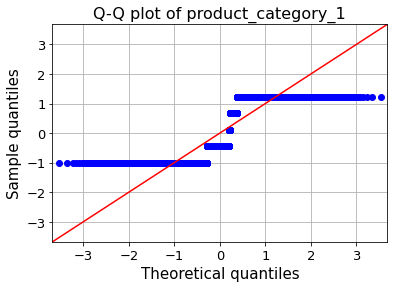

<Figure size 576x360 with 0 Axes>

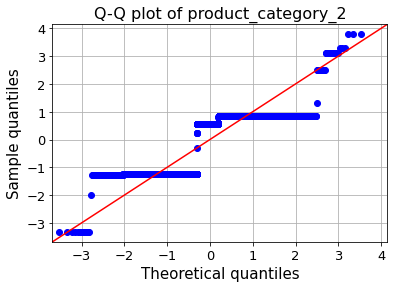

<Figure size 576x360 with 0 Axes>

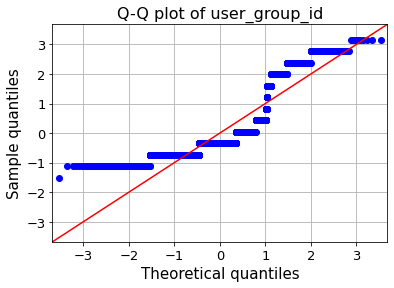

<Figure size 576x360 with 0 Axes>

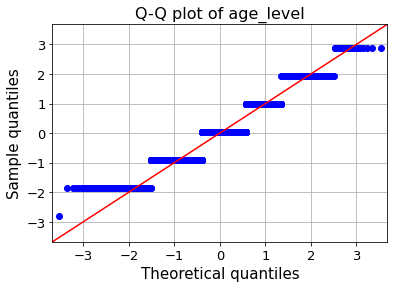

<Figure size 576x360 with 0 Axes>

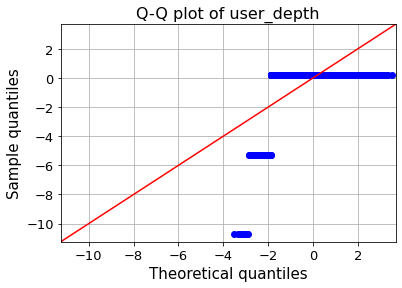

<Figure size 576x360 with 0 Axes>

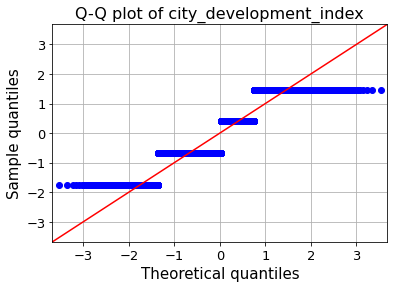

<Figure size 576x360 with 0 Axes>

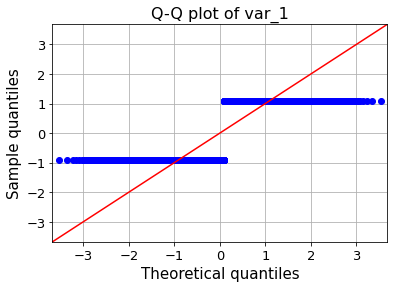

<Figure size 576x360 with 0 Axes>

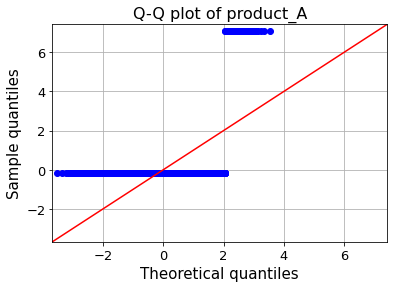

<Figure size 576x360 with 0 Axes>

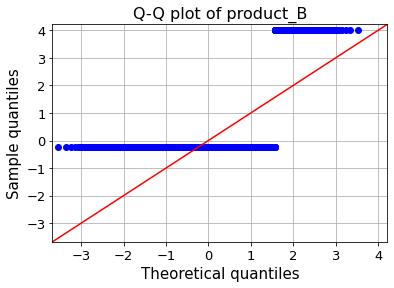

<Figure size 576x360 with 0 Axes>

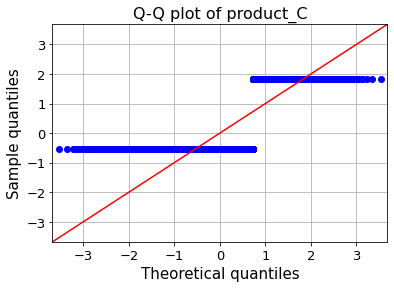

<Figure size 576x360 with 0 Axes>

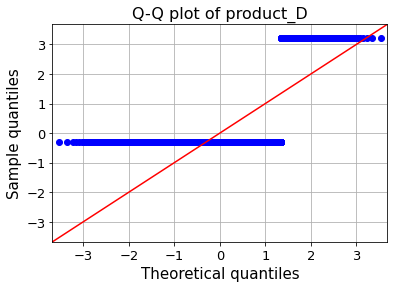

<Figure size 576x360 with 0 Axes>

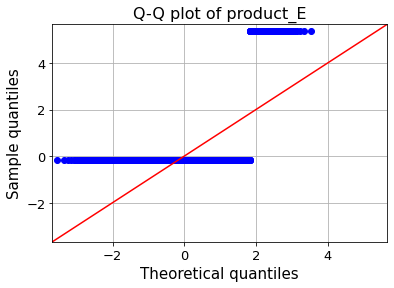

<Figure size 576x360 with 0 Axes>

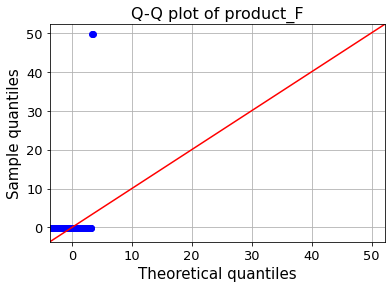

<Figure size 576x360 with 0 Axes>

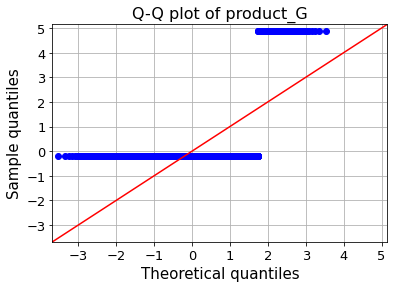

<Figure size 576x360 with 0 Axes>

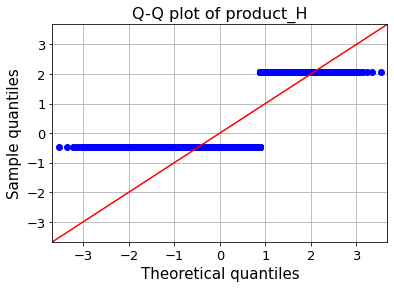

<Figure size 576x360 with 0 Axes>

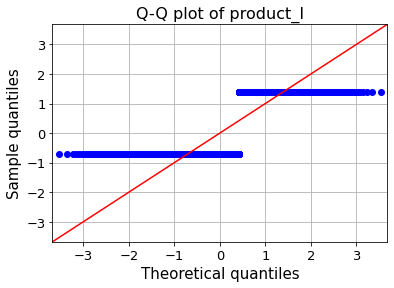

<Figure size 576x360 with 0 Axes>

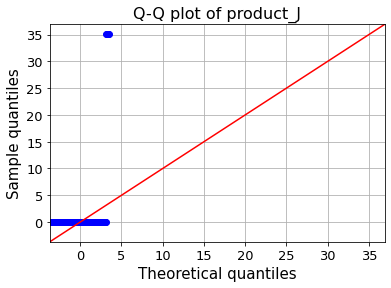

<Figure size 576x360 with 0 Axes>

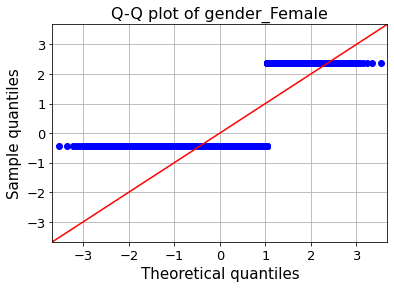

<Figure size 576x360 with 0 Axes>

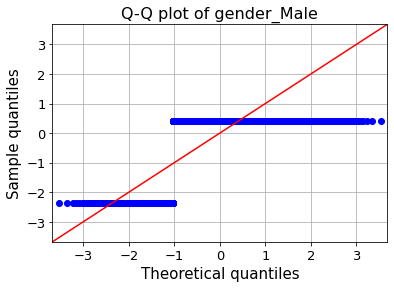

In [ ]:
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

## In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?

According to the graph the order is

*   webpage_id
*   product
*   city_development_index
*   user_group_id
*   campaign_id
*   product_category_1
*   age_level
*   product_category_2
*   user_depth
*   var_1


In any variable importance graph we have a scale in the range from 0 to 1 where 1 being the most significant predictor and 0 being the least.
We see that webpage_id being scaled at 1 as it is very important while product scaled at around 0.7 being the second most important significant.
user_depth and var_1 being the least important



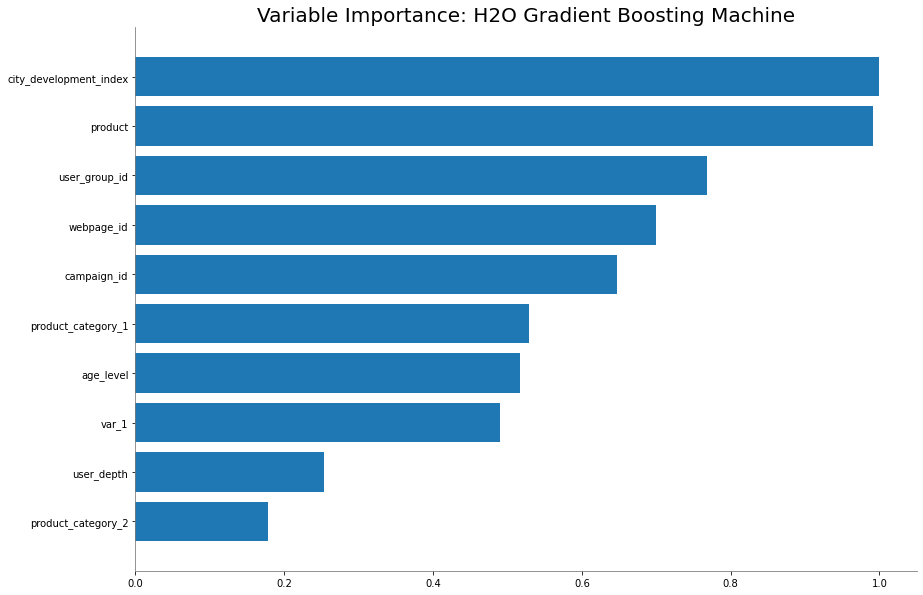

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
best_model.varimp_plot()

## Does the model make sense?

In [ ]:
print(aml.leader)
#calculates the R-squared value for the best-performing model in an H2O AutoML experiment on a validation dataset
r2 = aml.leader.r2(valid=True)
print("*"*10)
print(f"r2 value is {r2}")

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20230301_14421


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          187084                 0            15           13.8667       1             823           498.8

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06250649473143309
RMSE: 0.2500129891254314
LogLoss: 0.24128091155151826
Mean Per-Class Error: 0.40953532229511846
AUC: 0.6419055326112164
AUCPR: 0.10976184114979996
Gini: 0.2838110652224328

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08051179935688049
       0       1      Error    Rate
-----  ------  -----  -------  ----------------

## Does regularization help?

No, it didnt help

In [ ]:
data = h2o.import_file('https://raw.githubusercontent.com/Rhea3110/DSEM/main/Ad_click_prediction_train.csv')
print(data)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  ﻿session_id  DateTime                   user_id  product      campaign_id    webpage_id    product_category_1    product_category_2    user_group_id  gender      age_level    user_depth    city_development_index    var_1    is_click
       140690  02/07/2017 00:00  858557            C                 359520         13787                     4                   nan               10  Female              4             3                         3        0           0
       333291  02/07/2017 00:00  243253            C                 105960         11085                     5                   nan                8  Female              2             2                       nan        0           0
       129781  02/07/2017 00:00  243253            C                 359520         13787                     4                   nan                8  Female              2             2             

In [ ]:
y = 'is_click'
X_las = train.drop('DateTime')
X_las = X_las.drop('user_id')
X_las = X_las.drop('\ufeffsession_id')
X_las = X_las.drop(y)
X_las= X_las.col_names
# Split data into training and validation sets
train, test, valid = data.split_frame([0.7,0.15])

In [ ]:
# Identify categorical columns
# Train Lasso model
lasso_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1.0,  # Set alpha to 1 for L1 regularization (Lasso)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)
lasso_model.train( x=X_las, y=y, training_frame=train, validation_frame=valid, max_runtime_secs=600,)
# Making predictions on validation set
lasso_predictions = lasso_model.predict(test)
performance = lasso_model.model_performance(test)
confusion_matrix = performance.confusion_matrix().table
print(confusion_matrix)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0749510840488492
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      44248  20352  0.315    (20352.0/64600.0)
1      2744   1942   0.5856   (2744.0/4686.0)
Total  46992  22294  0.3333   (23096.0/69286.0)


In [ ]:
# convert the actual values and predicted values of the target variable from H2O frames to lists
a=test[y].as_data_frame().values.tolist()
b=lasso_predictions['predict'].as_data_frame().values.tolist()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(a,b)
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(accuracy)

0.6666570447132176


In [ ]:
ridge_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(family="binomial",
    alpha=0.0,  # Set alpha to 0 for L2 regularization (Ridge)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)
ridge_model.train(x=X_las, y=y, training_frame=train, validation_frame=valid, max_runtime_secs=600)
# Make predictions on test set
ridge_predictions = ridge_model.predict(test)
performance1 = ridge_model.model_performance(test)
confusion_matrix1 = performance.confusion_matrix().table
print(confusion_matrix1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0749510840488492
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      44248  20352  0.315    (20352.0/64600.0)
1      2744   1942   0.5856   (2744.0/4686.0)
Total  46992  22294  0.3333   (23096.0/69286.0)


In [ ]:
#converts the actual values and predicted values from H2O frames to lists
a1=test[y].as_data_frame().values.tolist()
b1=ridge_predictions['predict'].as_data_frame().values.tolist()
print(a)
print(b)
cm1 = confusion_matrix(a1,b1)
accuracy1 = (cm1[0,0] + cm1[1,1]) / cm1.sum()
print(accuracy1)


[[0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

In [ ]:
print(X_test_pd_h2o)

  campaign_id    webpage_id    product_category_1    product_category_2    user_group_id    age_level    user_depth    city_development_index    var_1    product_A    product_B    product_C    product_D    product_E    product_F    product_G    product_H    product_I    product_J    gender_Female    gender_Male
       404347         53587                     1                146115                2            2             3                         1        1            0            0            0            0            0            0            0            0            1            0                0              1
       404347         53587                     1                146115                2            2             3                         2        1            0            0            0            0            0            0            0            0            1            0                0              1
       105960         11085                     5            

## Which independent variables are significant?

In [ ]:
#same code for p value as above
import statsmodels.api as sm
dependent_var =y_train_pd['is_click']
independent_vars = X_train_pd[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']].reset_index(drop=True)
# Fitting the OLS model
model = sm.OLS(dependent_var, independent_vars).fit()
p_values = model.summary2().tables[1]['P>|t|']
print(p_values.round(4))

campaign_id               0.2524
webpage_id                0.8055
product_category_1        0.9417
product_category_2        0.4176
user_group_id             0.6959
age_level                 0.6893
user_depth                0.3683
city_development_index    0.9320
var_1                     0.0030
product_A                 0.6306
product_B                 0.5971
product_C                 0.4172
product_D                 0.5587
product_E                 0.0639
product_F                 0.7805
product_G                 0.4258
product_H                 0.0873
product_I                 0.6815
product_J                 0.0257
gender_Female             0.9931
gender_Male               0.0063
Name: P>|t|, dtype: float64


## Which hyperparameters are important?

Hyperparameter tuning is the process of selecting the best combination of hyperparameters for a machine learning model to achieve optimal performance on a given task. It can significantly impact the performance of the model, and the choice of the tuning technique, performance metric, and search strategy are important factors to consider. A common practice is to perform an initial coarse search followed by a finer search around the best hyperparameters found in the initial search. It is important to report the results of hyperparameter tuning systematically to reproduce the results and compare the performance of different models and tuning methods.

In [ ]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator
#a list of values to try for each hyperparameter during the tuning process.
hyper_params = {'learn_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7], 'sample_rate': [0.7, 0.8, 0.9]}

In [ ]:
model = H2OGradientBoostingEstimator()
# create grid search object
grid = H2OGridSearch(model, hyper_params,grid_id='gbm_grid', search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1})

In [ ]:
# train grid search
grid.train(x=X, y=y, training_frame=train, nfolds=5)

gbm Grid Build progress: |███ (cancelled)
Errors/Warnings building gridsearch model

Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.8
failure_details: Job Canceled
failure_stack_traces: water.Job$JobCancelledException
	at hex.tree.SharedTree$Driver.scoreAndBuildTrees(SharedTree.java:532)
	at hex.tree.SharedTree$Driver.computeImpl(SharedTree.java:405)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:253)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1677)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)




H2OJobCancelled: ignored

In [ ]:
#best hyperparameters
best_model = grid.get_grid()[0]
print(best_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_model_21', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_model_21'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_10_sid_93a4', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_10_sid_93a4'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_10_sid_93a4', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_10_sid_93a4'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 5}, 'keep_cross_validation_models': {'default': True, 'actual': True, 'input': True}, 'keep_cross_validation_predictions': {'default': False, 'actual': False, 'input': False}, 'keep_cross_validation_fold_assignment': {'default': False, 

In [ ]:
#retrieve the grid search results sorted in increasing order of performance
gbm_gridperf2 = grid.get_grid(decreasing=False)
print(gbm_gridperf2)

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     learn_rate    max_depth    sample_rate    model_ids          residual_deviance
---  ------------  -----------  -------------  -----------------  -------------------
     0.05          5.0          0.9            gbm_grid_model_21  0.06271168122566775
     0.1           5.0          0.8            gbm_grid_model_3   0.06271226310404755
     0.1           5.0          0.9            gbm_grid_model_8   0.0627130515817093
     0.1           5.0          0.7            gbm_grid_model_19  0.0627159825268274
     0.05          5.0          0.7            gbm_grid_model_11  0.06271703469894005
     0.05          5.0          0.8            gbm_grid_model_4   0.06271821769492515
     0.05          7.0          0.7            gbm_grid_model_6   0.06272032455639447
     0.05          7.0          0.9            gbm_grid_model_16  0.06272163728029354
     0.1           7.0          0.9            gbm_grid_model_26  0.0627

In [ ]:
#converting in list
list_hyperparameters = []
for i in range(len(gbm_gridperf2)):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate

In [ ]:
models = gbm_gridperf2.models

In [ ]:
print(models)

[H2OGradientBoostingEstimator({'parms': {'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_model_21', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_model_21'}, 'input_value': None, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'training_frame', 'label': 'training_frame', 'help': 'Id of the training data frame.', 'required': False, 'type': 'Key<Frame>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_na

In [ ]:
list_training_deviance = []
print(models[1])
for i in range(len(gbm_gridperf2)):
    model = models[i]
  # print(model)
    performance_metrics = model.model_performance(test)
    training_deviance = performance_metrics.mean_residual_deviance()
    list_training_deviance.append(training_deviance)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_grid_model_3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          14183                  0            5            2.8           1             32            17.9

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.06261731439703243
RMSE: 0.25023451879593356
MAE: 0.12531225107635022
RMSLE: 0.1743999856340643
Mean Residual Deviance: 0.06261731439703243

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.06271226310404755
RMSE: 0.25042416637386966
MAE: 0.12542519675745503
RMSLE: 0.17457820582395583
Mean Residual Deviance: 0.06271226310404755

C

In [ ]:
for i in range(len(gbm_gridperf2)):
    list_hyperparameters[i]["Mean Residual Deviance"] = list_training_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)
print(hyperparameters_dataframe)


    learn_rate  max_depth  sample_rate   logloss  Mean Residual Deviance
0         0.05          5          0.9  0.062873                0.062873
1         0.10          5          0.8  0.062873                0.062873
2         0.10          5          0.9  0.062869                0.062869
3         0.10          5          0.7  0.062873                0.062873
4         0.05          5          0.7  0.062876                0.062876
5         0.05          5          0.8  0.062874                0.062874
6         0.05          7          0.7  0.062877                0.062877
7         0.05          7          0.9  0.062870                0.062870
8         0.10          7          0.9  0.062882                0.062882
9         0.05          7          0.8  0.062869                0.062869
10        0.10          7          0.8  0.062876                0.062876
11        0.10          7          0.7  0.062889                0.062889
12        0.10          3          0.9  0.062902   

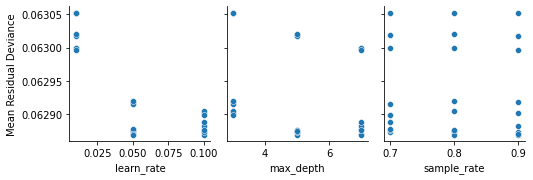

In [ ]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Mean Residual Deviance"],
    x_vars=["learn_rate", "max_depth", "sample_rate"],
)

Best param being learn_rate: 0.05 max_depth:5 sample rate:0.9


Coding Professionalism?
Yes, I take full ownership of my code

# Conclusion
My understanding of H2O AutoML is that it's an effective way to create precise predictive models without the need for manual tuning of hyperparameters. It's versatile in that it supports supervised learning tasks such as classification and regression. Furthermore, I gained knowledge about variable importance and successfully utilized Ridge and LASSO regularization techniques. Lastly, I applied the Random Grid Search method to fine-tune hyperparameters. I also realized the significance of quantifiers in the training process and how they can significantly impact data training

References
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
* https://www.h2o.ai/blog/efficiently-automating-machine-learning-with-h2o-automl/
* https://analyticsindiamag.com/h2o-ai-automl-simplifying-machine-learning-for-everyone/
* https://joss.theoj.org/papers/10.21105/joss.01371
* https://www.h2o.ai/h2o-tutorials/latest-stable/h2o-world-2019-automated-machine-learning-with-h2o-automl/index.html
* https://www.youtube.com/watch?v=BC_1vRYMx_c
*   Pandas Documentation
*   Sklearn Documentation
*   A Complete Guide to Dealing with Missing values in Python


Copyright 2023 Rhea Bajpai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.